In [59]:
import pandas as pd
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [12]:
df=pd.read_csv(r'https://raw.githubusercontent.com/Gladiator07/Harvestify/master/Data-processed/crop_recommendation.csv')
df.rename(columns={'label':"crop"},inplace=True)

# Basic Statistics on numeric columns

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


# Check for Null values

In [14]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

**Comment :-** No null value present.

# Splitting the dataset into dependent and independent features

In [21]:
y=df['crop']
X=df.drop(columns='crop')

**Split the data into training set and testing set**

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size= 0.25,random_state=42)

# Decision Tree Classifier

In [26]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name
class_name

['mothbeans',
 'pomegranate',
 'papaya',
 'pigeonpeas',
 'apple',
 'kidneybeans',
 'orange',
 'rice',
 'mungbean',
 'watermelon',
 'coconut',
 'jute',
 'lentil',
 'chickpea',
 'cotton',
 'grapes',
 'mango',
 'muskmelon',
 'maize',
 'coffee',
 'banana',
 'blackgram']

In [28]:
clf.score(x_train,y_train)

1.0

In [29]:
py_pred = clf.predict(x_test)

In [30]:
clf.score(x_test,y_test)

0.9836363636363636

# Let's try to increase the accuracy by using hyperparameter tuning

In [31]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,6,1),
    'min_samples_split': range(2,5,1),
    'splitter' : ['best', 'random']
}

In [34]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [35]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best', 'random']})

In [36]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


In [37]:
grid_search.best_score_

0.990909090909091

In [38]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =11, min_samples_leaf= 1, min_samples_split= 3, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=3)

In [39]:
clf.score(x_test,y_test)

0.9854545454545455

**Comment:-Looks like accuracy for training has increased by very small margin.**

# Let's visualize the tree:

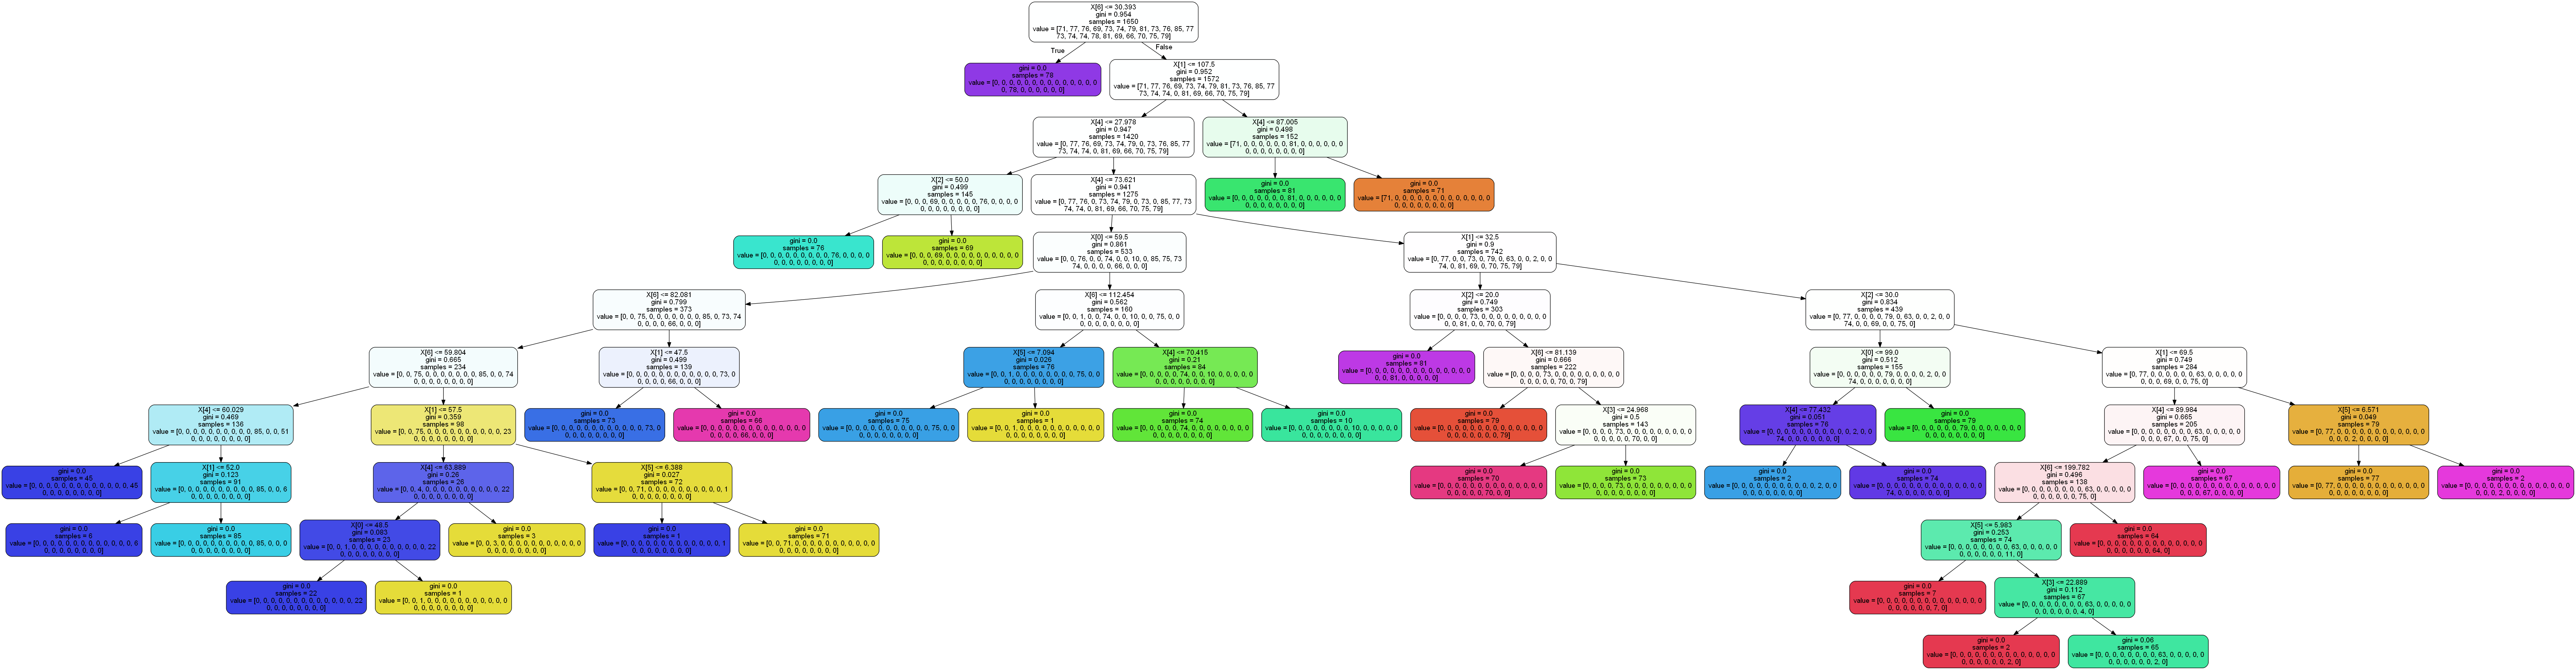

In [43]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [66]:
clf.predict([[38,60,20,29.848231,60.638726 ,7.491217,46.804526]])

array(['lentil'], dtype=object)

In [65]:
df[df['crop']=='lentil']

,N,P,K,temperature,humidity,ph,rainfall,crop
800,32,76,15,28.051536,63.498022,7.604110,43.357954,lentil
801,13,61,22,19.440843,63.277715,7.728832,46.831301,lentil
802,38,60,20,29.848231,60.638726,7.491217,46.804526,lentil
803,11,74,17,21.363838,69.923759,6.633865,46.635286,lentil
804,37,71,16,26.286639,68.519667,7.324863,46.138330,lentil
...,...,...,...,...,...,...,...,...
895,26,56,22,23.052764,60.424786,7.011121,52.602853,lentil
896,9,77,17,21.658458,63.583371,6.280726,38.076594,lentil
897,4,59,19,26.250703,67.627797,7.621495,40.810630,lentil
898,34,73,15,20.971953,63.831799,7.630424,53.102079,lentil
